# Sanjay V

## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the dataset

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Virtualization

### i) Univariate Analysis









(array([5084.,    0.,    0., 4590.,    0.,    0.,  266.,    0.,    0.,
          60.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

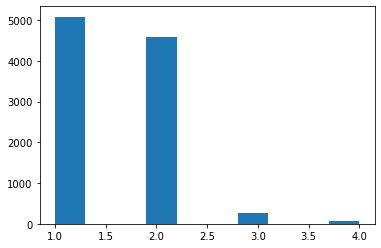

In [ ]:
plt.hist(df['NumOfProducts'])



### ii) Bi-variate Analysis



<AxesSubplot:xlabel='Tenure', ylabel='Age'>

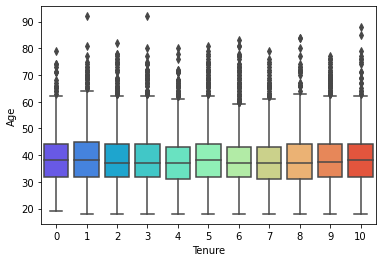

In [ ]:
sns.boxplot(x='Tenure',y='Age',data=df,palette='rainbow')




### iii) Multi-variate analysis





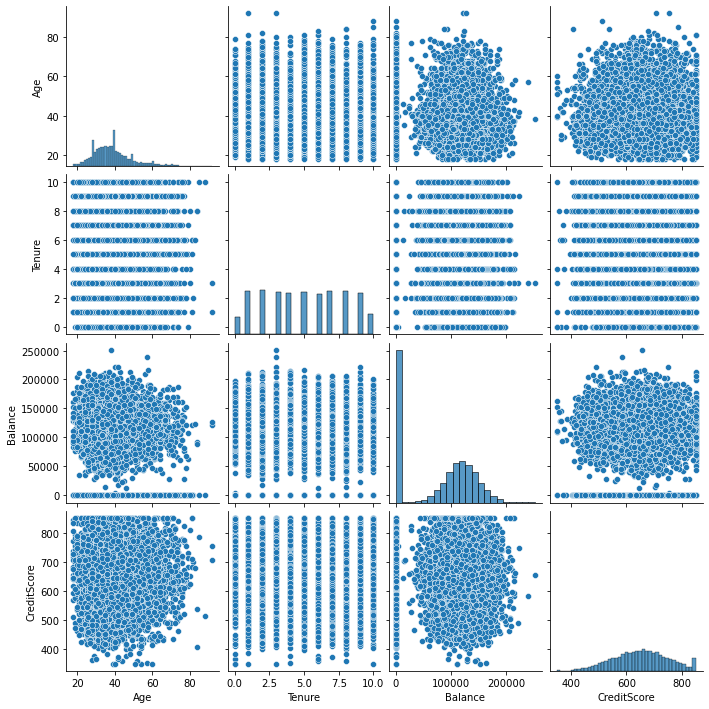

In [ ]:
sns.pairplot(data=df[['Age','Tenure','Balance','Geography','CreditScore']])

## 4. Perform descriptive statistics on the dataset.

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Missing values

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 6. Find the outliers and replace the outliers

<AxesSubplot:xlabel='Tenure'>

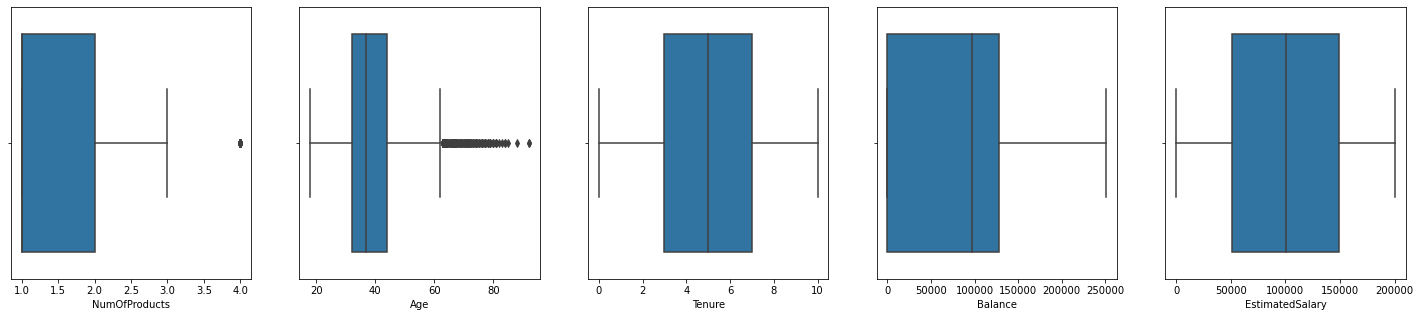

In [ ]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 5, 4)
sns.boxplot(x=df['Balance'])

plt.subplot(1, 5, 1)
sns.boxplot(x=df['NumOfProducts'])

plt.subplot(1, 5, 5)
sns.boxplot(x=df['EstimatedSalary'])

plt.subplot(1, 5, 2)
sns.boxplot(x=df['Age'])

plt.subplot(1, 5, 3)
sns.boxplot(x=df['Tenure'])

In [ ]:
q=df.quantile(q=[0.25,0.75])
q

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [ ]:
iqr=q.loc[0.75]-q.loc[0.25] 
iqr

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [ ]:
l=q.loc[0.25]-(1.5*iqr)
l

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [ ]:
u=q.loc[0.75]+(1.5*iqr)
u

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

In [ ]:
df.mean()

C:\Users\Srikesh\AppData\Local\Temp/ipykernel_14740/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [ ]:
df['CreditScore']=np.where(df['CreditScore']<383,650,df['CreditScore'])

<AxesSubplot:xlabel='CreditScore'>

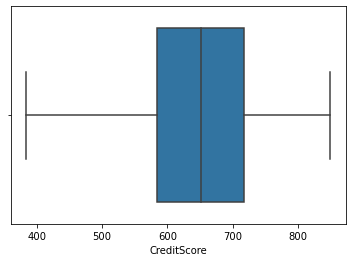

In [ ]:
sns.boxplot(x=df['CreditScore'])

## 7. Check for Categorical columns and perform encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [ ]:
df=pd.get_dummies(df,columns=['Geography'])
df

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


## 8. Split the data into dependent and independent variables

In [ ]:
#dependent variable

y=df['EstimatedSalary']
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [ ]:
#independent variable

x=df.drop(columns=['EstimatedSalary','Surname'],axis=1)
x.head()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,619,0,42,2,0.00,1,1,1,1,1,0,0
1,2,15647311,608,0,41,1,83807.86,1,0,1,0,0,0,1
2,3,15619304,502,0,42,8,159660.80,3,1,0,1,1,0,0
3,4,15701354,699,0,39,1,0.00,2,0,0,0,1,0,0
4,5,15737888,850,0,43,2,125510.82,1,1,1,0,0,0,1


## 9. Scale the independent variables

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
x=scale(x)
x

array([[-1.73187761, -0.78321342, -0.33295155, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [-1.7315312 , -0.60653412, -0.44754043, ..., -1.00280393,
        -0.57873591,  1.74273971],
       [-1.73118479, -0.99588476, -1.55176059, ...,  0.99720391,
        -0.57873591, -0.57380915],
       ...,
       [ 1.73118479, -1.47928179,  0.60459387, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [ 1.7315312 , -0.11935577,  1.26087566, ..., -1.00280393,
         1.72790383, -0.57380915],
       [ 1.73187761, -0.87055909,  1.46921909, ...,  0.99720391,
        -0.57873591, -0.57380915]])

## 10. Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(f"X_Train Shape: {x_train.shape}, Y_Train Shape: {y_train.shape}")
print(f"X_Test Shape: {x_test.shape}, Y_Train Shape: {y_test.shape}")

X_Train Shape: (8000, 14), Y_Train Shape: (8000,)
X_Test Shape: (2000, 14), Y_Train Shape: (2000,)
